In [135]:
import numpy as np
import cv2
import os, os.path
import skimage
from  skimage.feature import hog
#import skimage.exposure

percentage = 0.8
ppc = 5 # Pixels per cell

# Construccion de base de datos
#imageDir = os.getcwd()
imageDir = '../entrenamiento'
labels = []
dic = {}

imageDir = os.getcwd()
file_list = os.listdir(imageDir + '/../entrenamiento')
    
for folder in file_list:
    #if os.path.isdir(folder) and folder[0] != '.': # '.ipynb_checkpoints'
    labels.append(ord(folder))
    dic[ord(folder)] = []

    for file in os.listdir(imageDir + '/../entrenamiento/' + folder):
        dic[ord(folder)].append(folder + "/" + file)
            
D=[] # Descriptores
L=[] # Etiquetas

# Construir dataset de entrenamiento

for label in labels:
    size = len(dic[label])
    for im in dic[label][:int(size * percentage)]:
        auxIm = cv2.imread(imageDir + '/../entrenamiento/'+ im, 0)
        auxIm = cv2.resize(auxIm, (20, 20))
        fd=skimage.feature.hog(auxIm, orientations = 8, pixels_per_cell = (ppc, ppc), cells_per_block = (1, 1))
        
        D.append(fd)
        L.append(label)
        
T=[]
LT=[]

for label in labels:
    size = len(dic[label])
    for im in dic[label][int(size * percentage):]:
        auxIm = cv2.imread(imageDir + '/../entrenamiento/' + im, 0)
        auxIm = cv2.resize(auxIm, (20, 20))
        fd=hog(auxIm, orientations = 8, pixels_per_cell = (ppc, ppc), cells_per_block = (1, 1))
        
        T.append(fd)
        LT.append(label)

D = np.vstack(D)
L = np.vstack(L)

T = np.vstack(T)
LT = np.vstack(LT)

D = np.float32(D)
T = np.float32(T)

# Creamos maquina de aprendizaje
svm = cv2.ml.SVM_create()

svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)

svm.train(D, cv2.ml.ROW_SAMPLE, L)

result = svm.predict(T)[1]
mask = result == LT
correct = np.count_nonzero(mask)
print(chr(result[0]))

print(correct * 100.0/ result.size)

/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


S
98.88059701492537


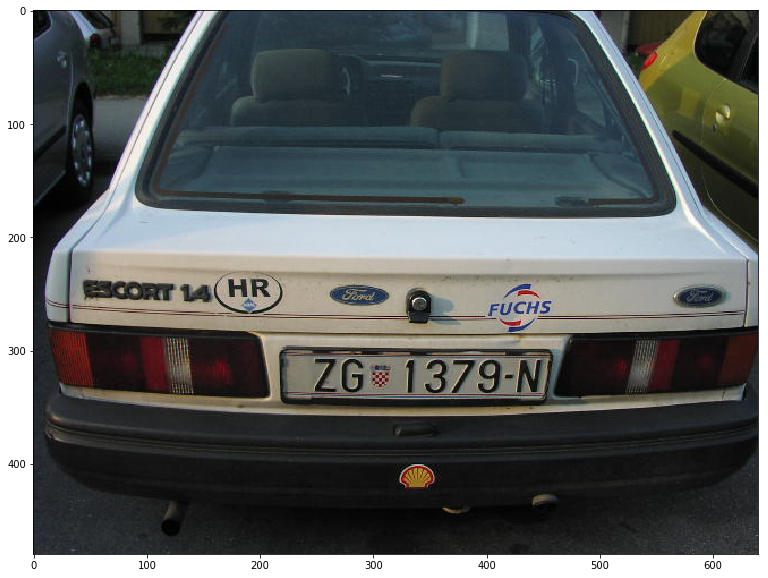

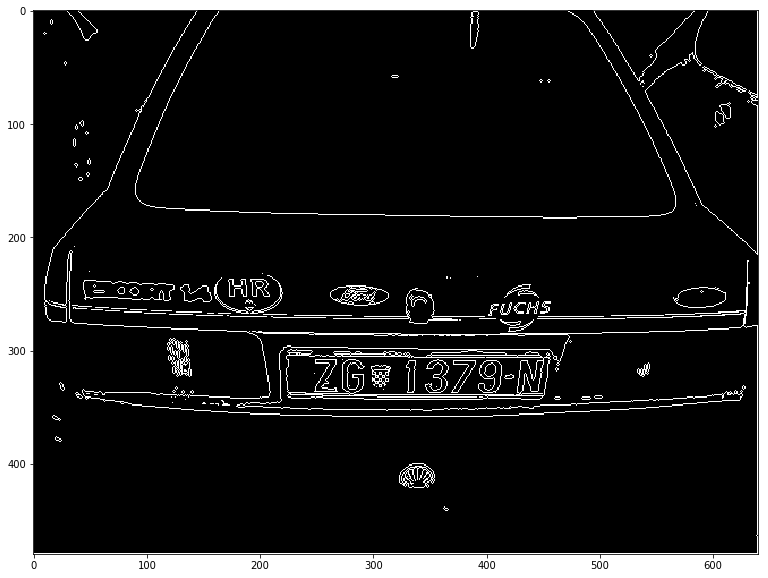

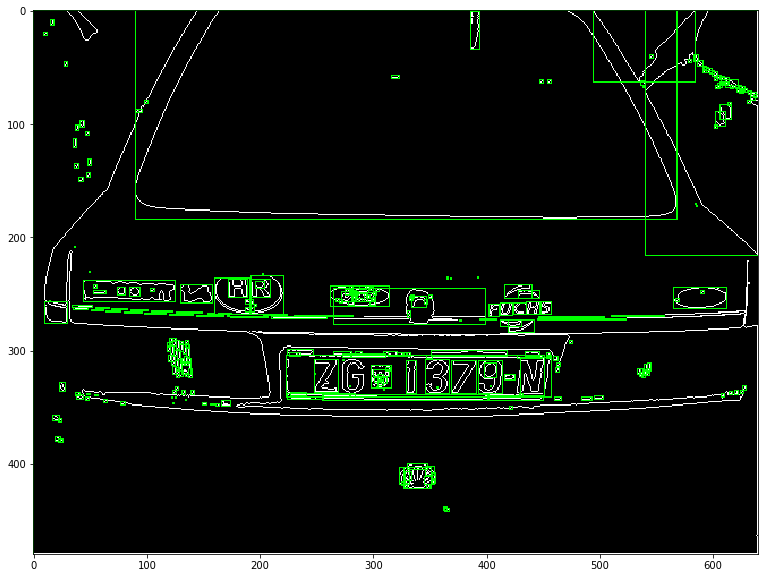

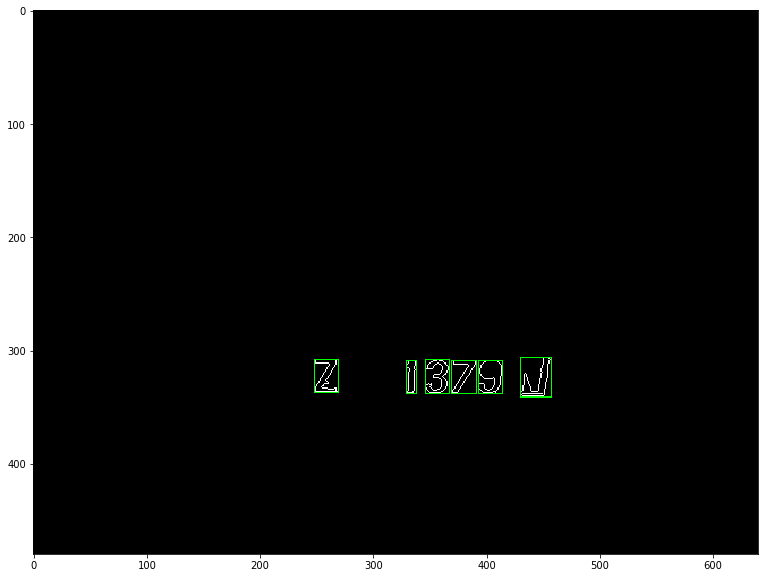

Z1379V


/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:111: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [191]:
# Main.py

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import math #extractValue

import DetectChars
import DetectPlates
import PossiblePlate

# module level variables ##########################################################################
SCALAR_BLACK = (0.0, 0.0, 0.0)
SCALAR_WHITE = (255.0, 255.0, 255.0)
SCALAR_YELLOW = (0.0, 255.0, 255.0)
SCALAR_GREEN = (0.0, 255.0, 0.0)
SCALAR_RED = (0.0, 0.0, 255.0)

showSteps = False
###################################################################################################
def dump(i, mode=1):
    plt.figure(figsize=(20, 10))
    #plt.figure()
    if mode == 1:
        plt.imshow(i)
    else:
        plt.imshow(i, 'gray')
    plt.show()
###################################################################################################
def main(path):

    imgOriginalScene  = cv2.imread(path)
    img_rgb = cv2.cvtColor(imgOriginalScene, cv2.COLOR_BGR2RGB)
    
    dump(img_rgb)
    
    # detectPlatesInScene
    listOfPossiblePlates = []                   # this will be the return value

    height, width, numChannels = imgOriginalScene.shape
    
    #####print(height, width, numChannels)
    
    img_gray = cv2.cvtColor(imgOriginalScene, cv2.COLOR_BGR2GRAY)
    #####dump(img_gray, 0)
    
    (thresh, im_bw) = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = (255-im_bw)
    #####dump(im_bw, 0)
    
    imgContours, contours, npaHierarchy = cv2.findContours(im_bw.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #####print(len(contours))
    #####print(contours[0])
    #####print(cv2.boundingRect(contours[0]))
    imgC = cv2.drawContours(np.zeros((height, width, 3), np.uint8), contours, -1, (255,255,255), 1)
    dump(imgC)    
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(imgC,(x,y),(x+w,y+h),(0,255,0),1)
    dump(imgC)
    
    possiblePlates = []
    
    for c in contours:
        possiblePlate = []
        for c1 in contours:
            if areSimilar(c, c1):
                possiblePlate.append(c1)
        possiblePlates.append(possiblePlate)
    
    possiblePlates.sort(key=len)
    #####print(len(possiblePlates))
    #####print(len(possiblePlates[-2]))
    test = [len(x) for x in possiblePlates]
    #####print(test)
    imgD = cv2.drawContours(np.zeros((height, width, 3), np.uint8), possiblePlates[-1], -1, (255,255,255), 1)
    for c in possiblePlates[-1]:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(imgD,(x,y),(x+w,y+h),(0,255,0),1)
    dump(imgD)
    
    mainPlate = possiblePlates[-1]
    
    letterImageArray = []
    
    mainPlate.sort(key=lambda x: returnleft(x))
    
    for letterCountour in mainPlate:
        x,y,w,h = cv2.boundingRect(letterCountour)
        temp = img_rgb[y:y+h,x:x+w]
        letterImageArray.append(temp)
        #####dump(temp)
           
    #letterImageArray = list(reversed(letterImageArray)) #ordenar por X (y tal vez por y para los dos pisos)
    
    P = []
    
    for l in letterImageArray:
        #####dump(l)
        auxl = cv2.resize(l, (20, 20))
        fd=hog(auxl, orientations = 8, pixels_per_cell = (ppc, ppc), cells_per_block = (1, 1))
        P.append(fd)
        
    P = np.vstack(P)
    P = np.float32(P)

    result = svm.predict(P)[1]
    mask = result == LT
    correct = np.count_nonzero(mask)
    rr = [ chr(r) for r in result ]
    print(''.join(rr))

    return
# end main

def returnleft(i):
    x,y,w,h = cv2.boundingRect(i)
    return x

def areSimilar(countour1, countour2):
    x,y,w,h = cv2.boundingRect(countour1)
    x1,y1,w1,h1 = cv2.boundingRect(countour2)
    
    if not h > 20:
        return False
    
    if not abs(y - y1) < 10:
        return False
    
    #if abs(h - h1)/h < 0.1 and abs(w - w1)/w < 0.1:
    #if abs(h - h1)/h < 0.15:
    if abs(h - h1)/h < 0.2 and abs(w - w1)/w < 4:
        return True
    else:
        return False


    
main('../070603/P6070088.jpg')